What is the relationship between the stroke population to diabetes, heart disease, and high blood pressure in respect to geographical area?
Five factors contribute to stroke.  
1.	Diabetes
2.	Heart Disease
3.	High Blood Pressure
4.	High Cholesterol
5.	Obesity


In [2557]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 

import seaborn as sns 
sns.set_style('darkgrid')

%matplotlib inline

%pip install scikit-learn  --upgrade --force
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_org = pd.read_csv("MasterCapStoneFile_01.csv" )


  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.1.0
    Uninstalling threadpoolctl-3.1.0:
      Successfully uninstalled threadpoolctl-3.1.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: scikit-learn
    Found existing

In [2558]:
df_org .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27210 entries, 0 to 27209
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HD_M_Value    27210 non-null  float64
 1   HD_M_US       27210 non-null  float64
 2   HD_M_REL_US   27210 non-null  float64
 3   HBP_M_Value   27210 non-null  float64
 4   HBP_M_US      27210 non-null  float64
 5   HBP_M_REL_US  27210 non-null  float64
 6   HC_M_Value    27210 non-null  float64
 7   HC_M_US       27210 non-null  float64
 8   HC_M_REL_US   27210 non-null  float64
 9   OB_M_Value    27210 non-null  float64
 10  OB_M_US       27210 non-null  float64
 11  OB_M_REL_US   27210 non-null  float64
 12  DB_M_Value    27210 non-null  float64
 13  DB_M_US       27210 non-null  float64
 14  DB_M_REL_US   27210 non-null  float64
 15  Target_Value  27210 non-null  float64
dtypes: float64(16)
memory usage: 3.3 MB


#df_OB_O_Less = df.loc[df["OB_M_Value"] < 12] # 16 records
#df_OB_O_Grt50 = df.loc[df["OB_M_Value"] > 50.0 ] # 62 records

#df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
#df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 25.0 ] # 99 records

#df_HD_O_Greater  = df.loc[df["HD_M_Value"] > 15.0 ] #  records

#df_HBP_O_Less = df.loc[df["HBP_M_Value"] < 15.0] # 72 records
#df_HBP_O_Greater  = df.loc[df["HBP_M_Value"] > 50.0 ] #  records


#df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] # 72 records
#df_HC_O_Greater  = df.loc[df["HC_M_Value"] > 45.0 ] #  records

In [2559]:
# Removing outliers by query for the values to keep

df = df_org.query("`OB_M_Value` >=0 & `OB_M_Value` <51 & `DB_M_Value` >0 & `DB_M_Value` <19  & `HD_M_Value` <10  & `HD_M_Value` >1  & `HBP_M_Value` >13 & `HBP_M_Value` <46 & `HC_M_Value` >22 & `HC_M_Value` <42  & `Target_Value` >1 & `Target_Value` < 5" )
print(df)






       HD_M_Value  HD_M_US  HD_M_REL_US  HBP_M_Value  HBP_M_US  HBP_M_REL_US  \
0             4.2      6.4    -0.343750         32.3      32.4     -0.003086   
2             5.8      6.4    -0.093750         33.8      32.4      0.043210   
3             4.4      6.4    -0.312500         27.4      32.4     -0.154321   
5             3.5      6.4    -0.453125         24.4      32.4     -0.246914   
6             5.5      6.4    -0.140625         28.1      32.4     -0.132716   
...           ...      ...          ...          ...       ...           ...   
27205         3.3      6.4    -0.484375         20.8      32.4     -0.358025   
27206         4.9      6.4    -0.234375         32.5      32.4      0.003086   
27207         6.7      6.4     0.046875         31.3      32.4     -0.033951   
27208         5.2      6.4    -0.187500         31.9      32.4     -0.015432   
27209         4.8      6.4    -0.250000         30.6      32.4     -0.055556   

       HC_M_Value  HC_M_US  HC_M_REL_US

In [2560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19112 entries, 0 to 27209
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HD_M_Value    19112 non-null  float64
 1   HD_M_US       19112 non-null  float64
 2   HD_M_REL_US   19112 non-null  float64
 3   HBP_M_Value   19112 non-null  float64
 4   HBP_M_US      19112 non-null  float64
 5   HBP_M_REL_US  19112 non-null  float64
 6   HC_M_Value    19112 non-null  float64
 7   HC_M_US       19112 non-null  float64
 8   HC_M_REL_US   19112 non-null  float64
 9   OB_M_Value    19112 non-null  float64
 10  OB_M_US       19112 non-null  float64
 11  OB_M_REL_US   19112 non-null  float64
 12  DB_M_Value    19112 non-null  float64
 13  DB_M_US       19112 non-null  float64
 14  DB_M_REL_US   19112 non-null  float64
 15  Target_Value  19112 non-null  float64
dtypes: float64(16)
memory usage: 2.5 MB


In [2561]:
#df["HD_M_Value"].describe()
#df["HC_M_Value"].describe()
#df["HBP_M_Value"].describe()
#df["OB_M_Value"].describe()
#df["DB_M_Value"].describe()
df["Target_Value"].describe()

count    19112.000000
mean         2.840828
std          0.850926
min          1.100000
25%          2.200000
50%          2.800000
75%          3.400000
max          4.900000
Name: Target_Value, dtype: float64

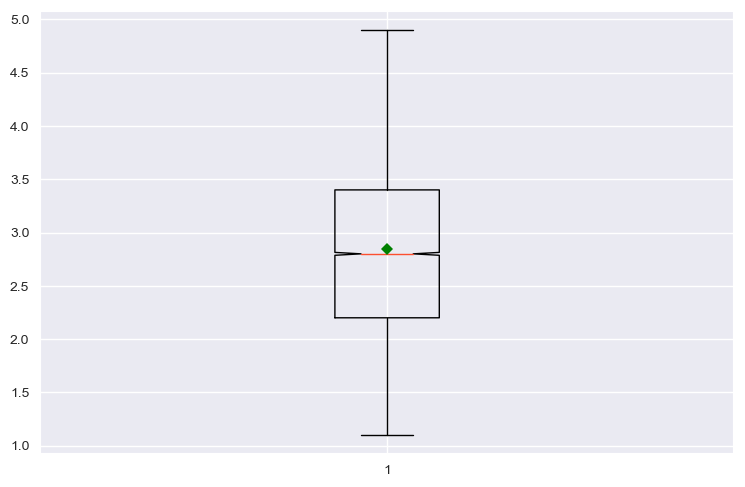

In [2562]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 
plt.boxplot(x=df['Target_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

In [2563]:
df.head()

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
0,4.2,6.4,-0.343750,32.3,32.4,-0.003086,34.1,34.1,0.000000,30.3,30.1,0.006645,12.2,10.8,0.129630,3.4
2,5.8,6.4,-0.093750,33.8,32.4,0.043210,36.7,34.1,0.076246,17.3,30.1,-0.425249,9.9,10.8,-0.083333,3.1
3,4.4,6.4,-0.312500,27.4,32.4,-0.154321,27.1,34.1,-0.205279,22.1,30.1,-0.265781,14.7,10.8,0.361111,2.0
5,3.5,6.4,-0.453125,24.4,32.4,-0.246914,27.5,34.1,-0.193548,25.3,30.1,-0.159468,11.4,10.8,0.055556,2.6
6,5.5,6.4,-0.140625,28.1,32.4,-0.132716,33.7,34.1,-0.011730,22.5,30.1,-0.252492,3.4,10.8,-0.685185,2.9


In [2564]:
#print(df.isna)
df.isna().sum()

HD_M_Value      0
HD_M_US         0
HD_M_REL_US     0
HBP_M_Value     0
HBP_M_US        0
HBP_M_REL_US    0
HC_M_Value      0
HC_M_US         0
HC_M_REL_US     0
OB_M_Value      0
OB_M_US         0
OB_M_REL_US     0
DB_M_Value      0
DB_M_US         0
DB_M_REL_US     0
Target_Value    0
dtype: int64

In [2565]:
# Count and determine the outliers 
HD_degree_counts = df['HD_M_Value'].value_counts() 
HBP_degree_counts = df['HBP_M_Value'].value_counts()
HC_degree_counts = df['HC_M_Value'].value_counts(normalize=True) # get the percentage for each group.
OB_degree_counts = df['OB_M_Value'].value_counts()
DB_degree_counts = df['DB_M_Value'].value_counts()

#print(HD_degree_counts)
#print(HBP_degree_counts)
#print(HC_degree_counts)
print(OB_degree_counts)
#print(DB_degree_counts)

26.8    118
27.1    113
26.5    113
27.9    112
24.6    109
       ... 
9.7       1
11.5      1
9.6       1
11.2      1
10.9      1
Name: OB_M_Value, Length: 404, dtype: int64


In [2566]:
## after dropping  8097  rows of outliers.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HD_M_Value,19112.0,5.315435,1.704583e+00,1.100000,4.100000,5.200000,6.400000,9.900000
HD_M_US,19112.0,6.400000,2.153001e-12,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,19112.0,-0.169463,2.663412e-01,-0.828125,-0.359375,-0.187500,0.000000,0.546875
HBP_M_Value,19112.0,29.301020,6.360551e+00,13.100000,25.000000,28.800000,33.300000,45.900000
HBP_M_US,19112.0,32.400000,1.168873e-11,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,19112.0,-0.095648,1.963133e-01,-0.595679,-0.228395,-0.111111,0.027778,0.416667
HC_M_Value,19112.0,31.673205,3.816437e+00,22.100000,29.100000,31.700000,34.300000,41.900000
HC_M_US,19112.0,34.100000,1.226429e-11,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,19112.0,-0.071167,1.119190e-01,-0.351906,-0.146628,-0.070381,0.005865,0.228739
OB_M_Value,19112.0,29.778746,7.842022e+00,9.600000,24.000000,29.000000,34.800000,50.900000


In [2567]:
# verifying outliers from the mean of both lower and upper quantiles.
# Obesity= 78
# Diabetes = 171

#df_OB_O_Less = df.loc[df["OB_M_Value"] < 12] # 16 records
#df_OB_O_Grt50 = df.loc[df["OB_M_Value"] > 50.0 ] # 62 records
#df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
#df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 25.0 ] # 99 records
#df_HD_O_Greater  = df.loc[df["HD_M_Value"] > 15.0 ] #  records
#df_HBP_O_Less = df.loc[df["HBP_M_Value"] < 15.0] # 72 records
#df_HBP_O_Greater  = df.loc[df["HBP_M_Value"] > 50.0 ] #  records
#df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] # 72 records
#df_HC_O_Greater  = df.loc[df["HC_M_Value"] > 50.0 ] #  records
#df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] # 72 records
#df_HC_O_Greater  = df.loc[df["HC_M_Value"] > 45.0 ] #  records

#=============================================================


df_HC_O_Less = df.loc[df["HC_M_Value"] < 15.0] 
df_HC_O_Grter  = df.loc[df["HC_M_Value"] > 45.0 ] 

#df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
#df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 25.0 ] # 99 records
#print(df_HC_O_Less["HC_M_Value"].value_counts())
#print(df_HC_O_Grter["HC_M_Value"].value_counts())




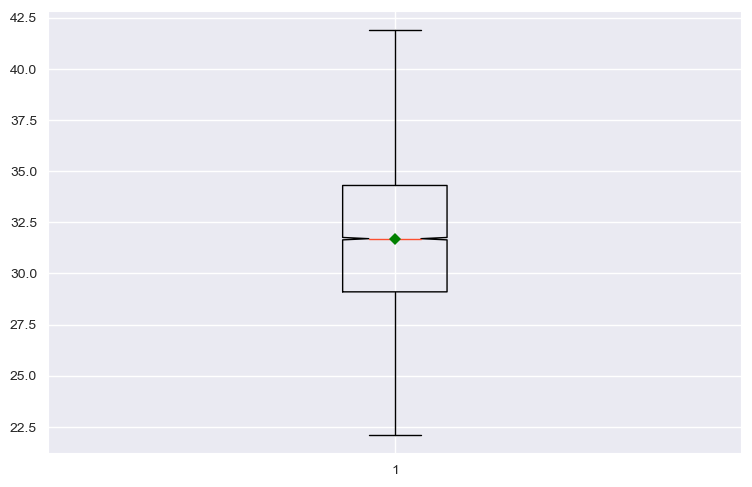

In [2568]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['HC_M_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

C:\Users\dolly\AppData\Local\Temp\ipykernel_2988\2210461807.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['OB_M_Value'])


<Axes: xlabel='OB_M_Value', ylabel='Density'>

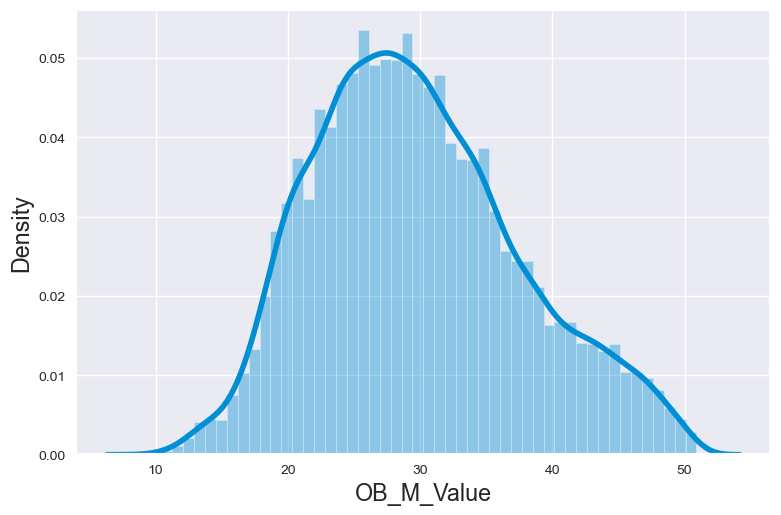

In [2569]:
sns.distplot(df['OB_M_Value'])

In [2570]:
df["OB_M_Value"].describe()



count    19112.000000
mean        29.778746
std          7.842022
min          9.600000
25%         24.000000
50%         29.000000
75%         34.800000
max         50.900000
Name: OB_M_Value, dtype: float64

In [2571]:
np.percentile(df['OB_M_Value'], [25, 50, 75, 100])

array([24. , 29. , 34.8, 50.9])

In [2572]:
import statistics

statistics.quantiles(df['OB_M_Value'])

[24.0, 29.0, 34.8]

In [2573]:
# Quantile mean it divide data into group.
# 0.50 is the median or 50% quantile. It's 0.5 quantile. 

df_Percentile = df.describe([0.15, 0.25, 0.50, 0.75])
df_Percentile

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
count,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000
mean,5.315435,6.400000e+00,-0.169463,29.301020,3.240000e+01,-0.095648,31.673205,3.410000e+01,-0.071167,29.778746,3.010000e+01,-0.010673,10.153558,1.080000e+01,-0.059856,2.840828
std,1.704583,2.153001e-12,0.266341,6.360551,1.168873e-11,0.196313,3.816437,1.226429e-11,0.111919,7.842022,1.080408e-11,0.260532,3.429738,2.945277e-12,0.317568,0.850926
min,1.100000,6.400000e+00,-0.828125,13.100000,3.240000e+01,-0.595679,22.100000,3.410000e+01,-0.351906,9.600000,3.010000e+01,-0.681063,0.900000,1.080000e+01,-0.916667,1.100000
15%,3.600000,6.400000e+00,-0.437500,23.000000,3.240000e+01,-0.290123,27.600000,3.410000e+01,-0.190616,21.500000,3.010000e+01,-0.285714,6.700000,1.080000e+01,-0.379630,1.900000
25%,4.100000,6.400000e+00,-0.359375,25.000000,3.240000e+01,-0.228395,29.100000,3.410000e+01,-0.146628,24.000000,3.010000e+01,-0.202658,7.700000,1.080000e+01,-0.287037,2.200000
50%,5.200000,6.400000e+00,-0.187500,28.800000,3.240000e+01,-0.111111,31.700000,3.410000e+01,-0.070381,29.000000,3.010000e+01,-0.036545,9.800000,1.080000e+01,-0.092593,2.800000
75%,6.400000,6.400000e+00,0.000000,33.300000,3.240000e+01,0.027778,34.300000,3.410000e+01,0.005865,34.800000,3.010000e+01,0.156146,12.300000,1.080000e+01,0.138889,3.400000
max,9.900000,6.400000e+00,0.546875,45.900000,3.240000e+01,0.416667,41.900000,3.410000e+01,0.228739,50.900000,3.010000e+01,0.691030,18.900000,1.080000e+01,0.750000,4.900000


In [2574]:
df_Percentile['HD_M_Value']

count    19112.000000
mean         5.315435
std          1.704583
min          1.100000
15%          3.600000
25%          4.100000
50%          5.200000
75%          6.400000
max          9.900000
Name: HD_M_Value, dtype: float64

In [2575]:
df_Percentile['HD_M_Value'][0]

19112.0

In [2576]:
df_Percentile['HD_M_Value']['mean']
df_Percentile['HD_M_Value']['std']
df_Percentile['HD_M_Value']['15%']

3.6

In [2577]:
HD_degree_counts = df['HD_M_Value'].value_counts()

In [2578]:
#df.info().T
#df.head()
#df
#df.columns
df.describe()
#df.isna().sum()
#df.shape 

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
count,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000,1.911200e+04,19112.000000,19112.000000
mean,5.315435,6.400000e+00,-0.169463,29.301020,3.240000e+01,-0.095648,31.673205,3.410000e+01,-0.071167,29.778746,3.010000e+01,-0.010673,10.153558,1.080000e+01,-0.059856,2.840828
std,1.704583,2.153001e-12,0.266341,6.360551,1.168873e-11,0.196313,3.816437,1.226429e-11,0.111919,7.842022,1.080408e-11,0.260532,3.429738,2.945277e-12,0.317568,0.850926
min,1.100000,6.400000e+00,-0.828125,13.100000,3.240000e+01,-0.595679,22.100000,3.410000e+01,-0.351906,9.600000,3.010000e+01,-0.681063,0.900000,1.080000e+01,-0.916667,1.100000
25%,4.100000,6.400000e+00,-0.359375,25.000000,3.240000e+01,-0.228395,29.100000,3.410000e+01,-0.146628,24.000000,3.010000e+01,-0.202658,7.700000,1.080000e+01,-0.287037,2.200000
50%,5.200000,6.400000e+00,-0.187500,28.800000,3.240000e+01,-0.111111,31.700000,3.410000e+01,-0.070381,29.000000,3.010000e+01,-0.036545,9.800000,1.080000e+01,-0.092593,2.800000
75%,6.400000,6.400000e+00,0.000000,33.300000,3.240000e+01,0.027778,34.300000,3.410000e+01,0.005865,34.800000,3.010000e+01,0.156146,12.300000,1.080000e+01,0.138889,3.400000
max,9.900000,6.400000e+00,0.546875,45.900000,3.240000e+01,0.416667,41.900000,3.410000e+01,0.228739,50.900000,3.010000e+01,0.691030,18.900000,1.080000e+01,0.750000,4.900000


In [2579]:
print("Index:  ", df.index)
print("Columns:", df.columns)
print("Size:   ", df.size)
print("Shape:  ", df.shape)
df.describe().T # run a quick stat 
#df.columns

Index:   Int64Index([    0,     2,     3,     5,     6,     7,     9,    10,    11,
               13,
            ...
            27199, 27200, 27201, 27202, 27204, 27205, 27206, 27207, 27208,
            27209],
           dtype='int64', length=19112)
Columns: Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')
Size:    305792
Shape:   (19112, 16)


,count,mean,std,min,25%,50%,75%,max
HD_M_Value,19112.0,5.315435,1.704583e+00,1.100000,4.100000,5.200000,6.400000,9.900000
HD_M_US,19112.0,6.400000,2.153001e-12,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,19112.0,-0.169463,2.663412e-01,-0.828125,-0.359375,-0.187500,0.000000,0.546875
HBP_M_Value,19112.0,29.301020,6.360551e+00,13.100000,25.000000,28.800000,33.300000,45.900000
HBP_M_US,19112.0,32.400000,1.168873e-11,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,19112.0,-0.095648,1.963133e-01,-0.595679,-0.228395,-0.111111,0.027778,0.416667
HC_M_Value,19112.0,31.673205,3.816437e+00,22.100000,29.100000,31.700000,34.300000,41.900000
HC_M_US,19112.0,34.100000,1.226429e-11,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,19112.0,-0.071167,1.119190e-01,-0.351906,-0.146628,-0.070381,0.005865,0.228739
OB_M_Value,19112.0,29.778746,7.842022e+00,9.600000,24.000000,29.000000,34.800000,50.900000


In [2580]:
# Total number for all the factors by cities

##OB_Mean = print(df["DB"].mean())
#DB_Mean = print(df["DB"].mean())
#HBP_Mean = print(df["HBP"].mean())
#HC_Mean = print(df["HC"].mean())
#HD_Mean = print(df["HD"].mean())

#OB_byUS = print(df["OBbyUS"].mean())
#DB_OB_byUS = print(df["DBbyUS"].mean())
#DB_OB_byUS = print(df["HBPbyUS"].mean())
#DB_OB_byUS = print(df["HCbyUS"].mean())
#HD_OB_byUS = print(df["HDbyUS"].mean())

#x_Risk_Factors = ['OB_Mean', 'DB_Mean','HBP_Mean', 'HC_Mean', 'HD_Mean']
#y_ByUS = df['OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'DB_OB_byUS', 'HD_OB_byUS' ]

#plt.bar(x_Risk_Factors,y_ByUS, color="#444444", lable="All Factors" )

#plt.title('All Risk Factors')
#plt.xlabel("Population by the factors")
#plt.ylabel("Median measured by %")
#plt.legend(loc='upper right')
#plt.tight_layout()
#plt.show()


In [2581]:
df.columns


Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [2582]:
#df["HD_M_Value"].describe()
#df["HC_M_Value"].describe()
#df["HBP_M_Value"].describe()
#df["OB_M_Value"].describe()
df["DB_M_Value"].describe()
#df["Target_Value"].describe()



count    19112.000000
mean        10.153558
std          3.429738
min          0.900000
25%          7.700000
50%          9.800000
75%         12.300000
max         18.900000
Name: DB_M_Value, dtype: float64

In [2583]:
#df.describe().T
df["Target_Value"].describe()

count    19112.000000
mean         2.840828
std          0.850926
min          1.100000
25%          2.200000
50%          2.800000
75%          3.400000
max          4.900000
Name: Target_Value, dtype: float64

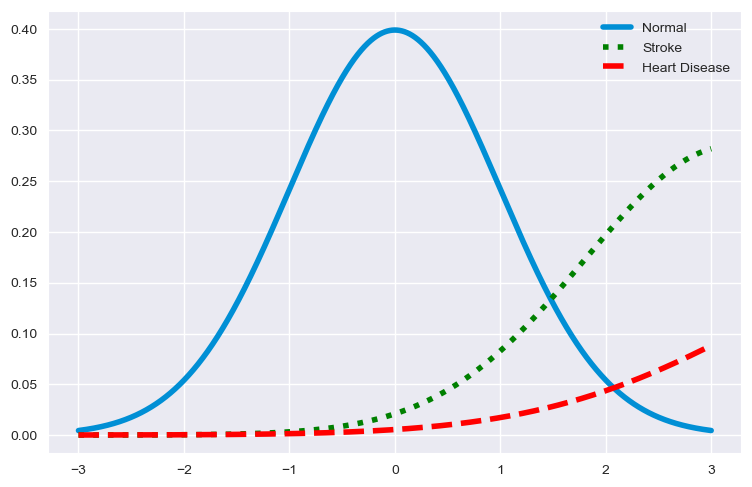

In [2584]:
from scipy.stats import norm


x = np.arange(-3, 3, 0.001)

plt.plot(x,norm.pdf(x)) # normal line
plt.plot(x, norm.pdf(x, 3.2, 1.4), 'g:') # mean of 3.2 and std 1.4 of stroke
plt.plot(x, norm.pdf(x, 5.6, 2.1), 'r--') # Heart Disease

plt.legend([ 'Normal', 'Stroke', 'Heart Disease',])
plt.show()

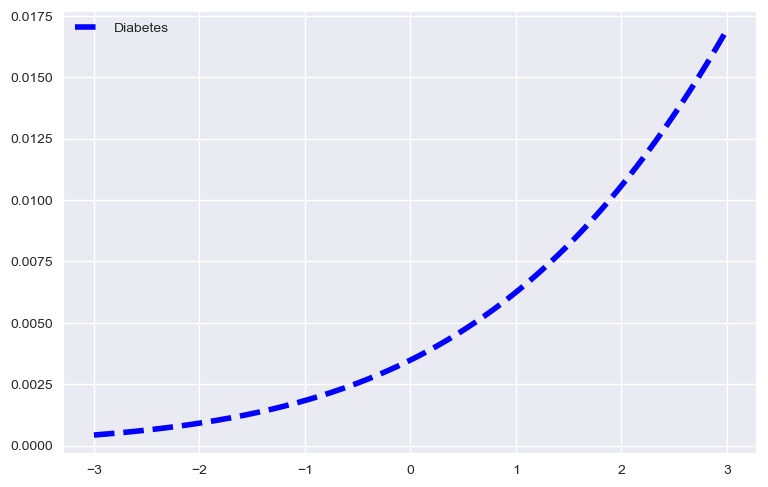

In [2585]:
x = np.arange(-3, 3, 0.001)

plt.plot(x, norm.pdf(x, 10.8, 4.2), 'b--') # DB
plt.legend([ 'Diabetes'])
plt.show()

In [2586]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [2587]:
from scipy.stats import skew

In [2588]:
# Cal.  and extract the lowest point lower quantile
df.HD_M_Value.quantile(0.3)

4.4

In [2589]:
# Cal.  and extract the highest point upper quantile
df.HD_M_Value.quantile(0.7)


6.1

In [2590]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

In [2591]:
# Extract Skewness 
HD_skew = skew(df['HD_M_Value'])
HBP_skew = skew(df['HBP_M_Value'])
HC_skew = skew(df['HC_M_Value'])

OB_skew = skew(df['OB_M_Value'])
DB_skew = skew(df['DB_M_Value'])
STK_skew = skew(df['Target_Value'])

print(HD_skew)
print(HBP_skew)
print(HC_skew)
print(OB_skew)
print(DB_skew)
print(STK_skew)



0.31822550937884453
0.2440983386931991
-0.04141745598724707
0.39347948883113487
0.34294882665638926
0.3327762902205886


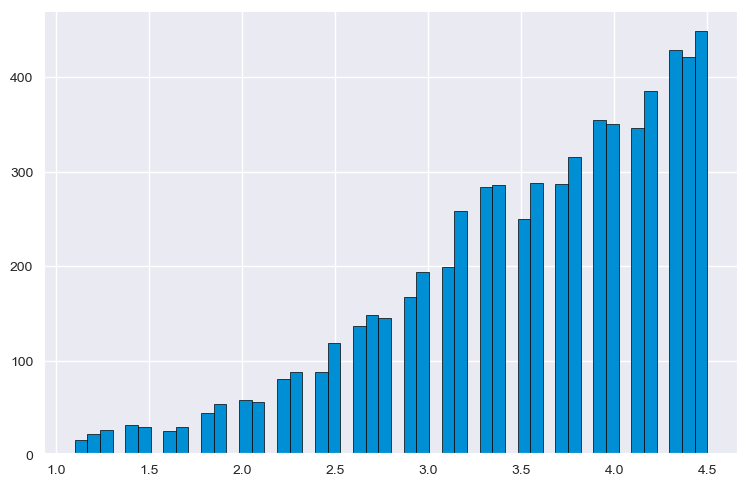

In [2592]:
# Highest point of lower quantile
df_HDs = df.loc[df["HD_M_Value"] < 4.6]
#df_HDs["HD_M_Value"]

plt.hist(df_HDs.HD_M_Value, bins=50, edgecolor='black')
plt.show()

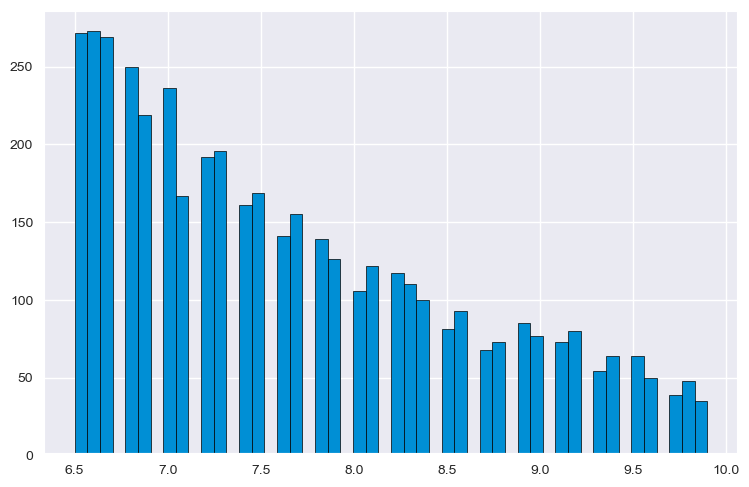

In [2593]:
# the highest point upper quantile
df.HD_M_Value.quantile(0.7)
df_HDx = df.loc[df["HD_M_Value"] > 6.4]
#df_HDs["HD_M_Value"]

plt.hist(df_HDx.HD_M_Value, bins=50, edgecolor='black')
plt.show()

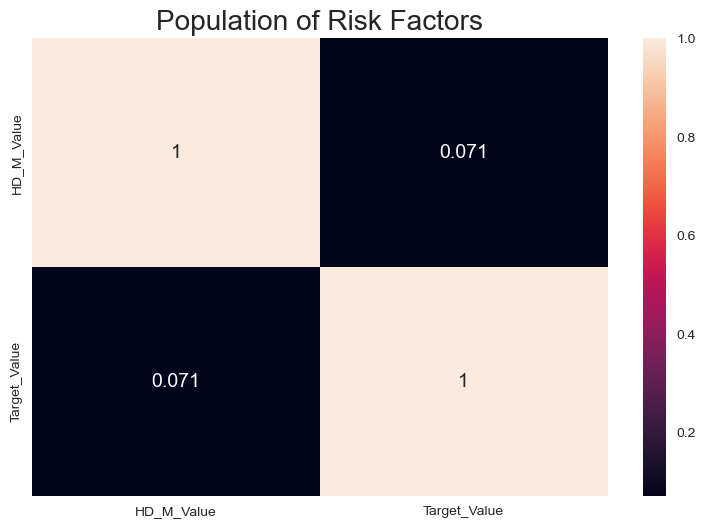

In [2594]:
plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['HD_M_Value','Target_Value']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

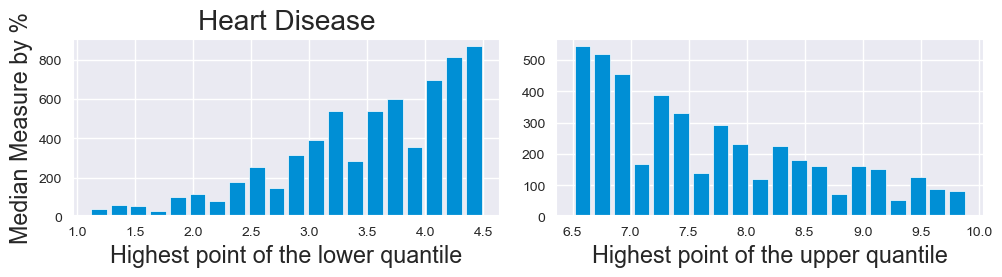

In [2595]:

plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 

df_HDs = df.loc[df["HD_M_Value"] < 4.6]

plt.hist(df_HDs.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the lower quantile')
plt.ylabel('Median Measure by %')
plt.title('Heart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')



df_HDx = df.loc[df["HD_M_Value"] > 6.4]

plt.subplot(2,3,2) 
plt.hist(df_HDx.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the upper quantile')
#plt.ylabel('Median Measure by %')
plt.tight_layout()
#plt.legend(loc='upper right')

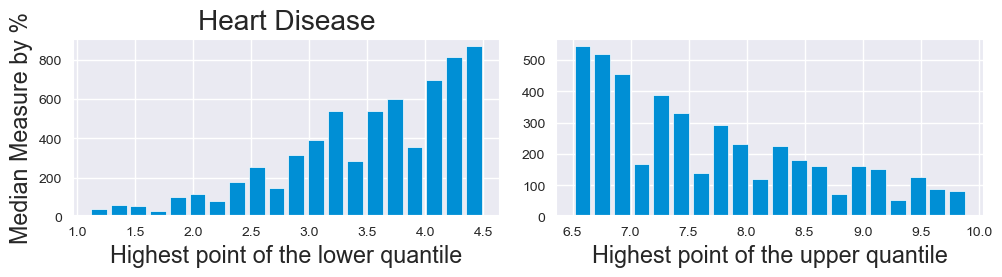

In [2596]:
plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 

df_HBPs = df.loc[df["HD_M_Value"] < 4.6]

plt.hist(df_HDs.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the lower quantile')
plt.ylabel('Median Measure by %')
plt.title('Heart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')



df_HDx = df.loc[df["HD_M_Value"] > 6.4]

plt.subplot(2,3,2) 
plt.hist(df_HDx.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
plt.xlabel('Highest point of the upper quantile')
#plt.ylabel('Median Measure by %')
plt.tight_layout()
#plt.legend(loc='upper right')

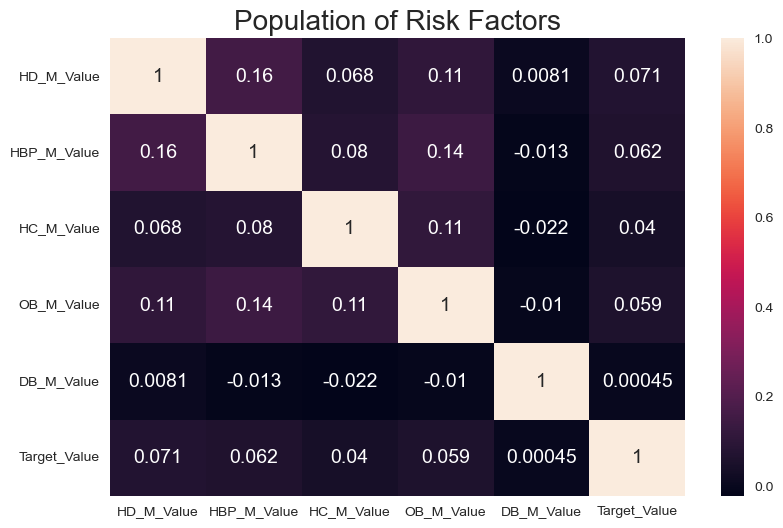

In [2597]:
#Heatmap - illustrate from the low to high scales.  It  shows which is skewed to the lower or higher end or from the median.
# Summary: Distribution of all the factors from cities in the US. 
plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['HD_M_Value', 'HBP_M_Value', 'HC_M_Value', 'OB_M_Value','DB_M_Value', 'Target_Value']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

Histrograms =  show the frequency of distribution. 

In [2598]:
from scipy.stats import poisson


In [2599]:
df["DB_M_Value"].describe()

count    19112.000000
mean        10.153558
std          3.429738
min          0.900000
25%          7.700000
50%          9.800000
75%         12.300000
max         18.900000
Name: DB_M_Value, dtype: float64

In [2600]:
DB_degree_counts = df['DB_M_Value'].value_counts()

print(DB_degree_counts)

8.9    264
9.1    261
8.3    254
8.4    251
9.4    248
      ... 
0.9      4
2.0      4
1.8      4
1.1      2
1.0      2
Name: DB_M_Value, Length: 180, dtype: int64


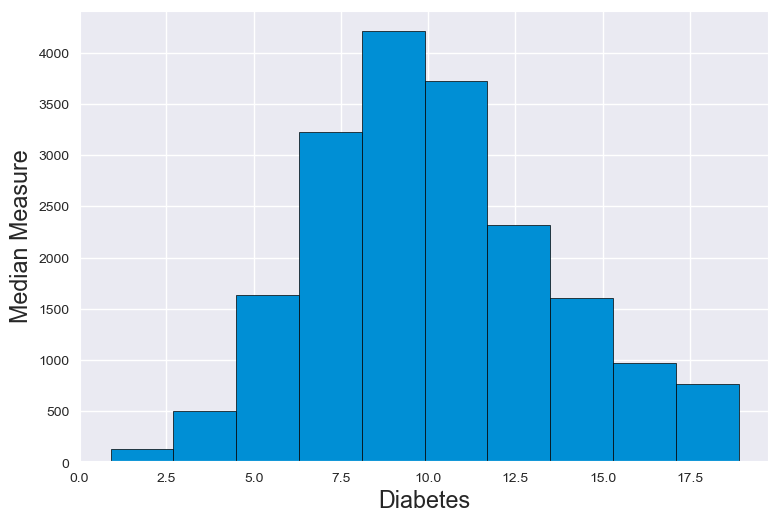

In [2601]:
#plt.title('Population by cities')
plt.xlabel('Diabetes')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses = df[['DB_M_Value']]
plt.hist(Diabetses,  edgecolor='black')
plt.show()

In [2602]:
df["DB_M_Value"].describe()

count    19112.000000
mean        10.153558
std          3.429738
min          0.900000
25%          7.700000
50%          9.800000
75%         12.300000
max         18.900000
Name: DB_M_Value, dtype: float64

In [2603]:
df_DB_O_Less = df.loc[df["DB_M_Value"] < 2] # 72 records below
df_DB_O_Greater  = df.loc[df["DB_M_Value"] > 20.0 ] # 99 records

print(df_DB_O_Less["HC_M_Value"].value_counts())
#print(df_DB_O_Greater["HC_M_Value"].value_counts())


29.9    4
36.3    2
32.0    2
34.5    2
36.5    2
29.7    2
29.8    2
30.6    2
24.6    1
34.0    1
31.2    1
26.0    1
30.9    1
28.4    1
33.9    1
32.8    1
35.8    1
39.7    1
33.0    1
35.7    1
29.3    1
32.3    1
37.0    1
36.7    1
29.2    1
23.0    1
30.1    1
34.2    1
29.1    1
28.7    1
32.4    1
34.7    1
31.4    1
29.5    1
34.9    1
36.2    1
30.5    1
28.3    1
30.2    1
28.5    1
31.9    1
31.1    1
27.2    1
33.4    1
33.3    1
Name: HC_M_Value, dtype: int64


In [2604]:
DB_skew = skew(df['DB_M_Value'])

print(DB_skew)

0.34294882665638926


<Axes: xlabel='DB_M_Value'>

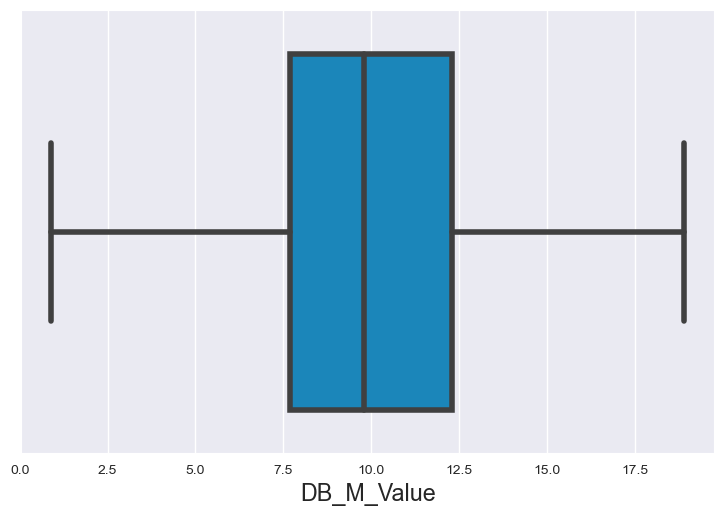

In [2605]:
sns.boxplot(x='DB_M_Value', data=df)


C:\Users\dolly\AppData\Local\Temp\ipykernel_2988\1637939683.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DB_M_Value'])


<Axes: xlabel='DB_M_Value', ylabel='Density'>

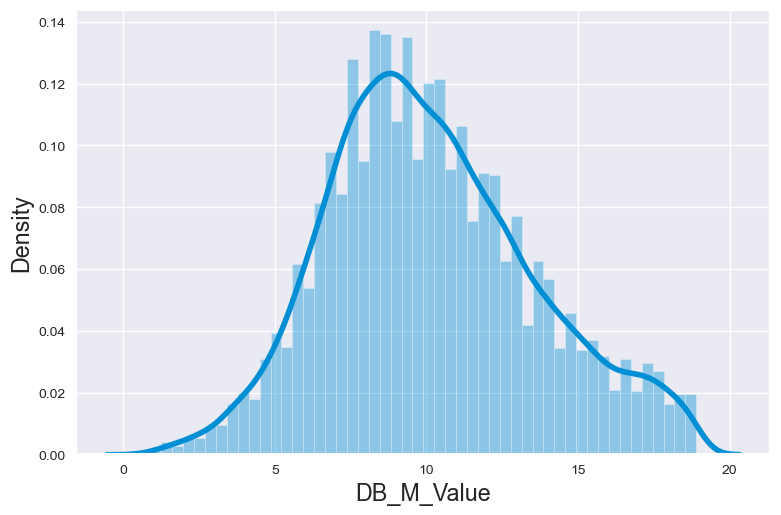

In [2606]:
sns.distplot(df['DB_M_Value'])

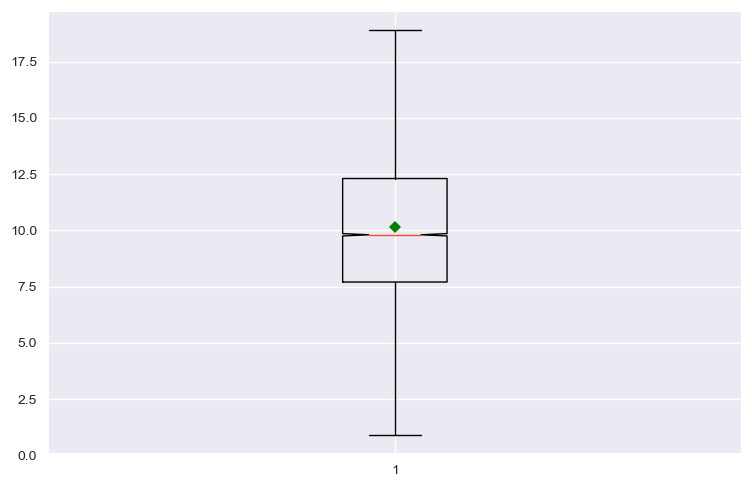

In [2607]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['DB_M_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

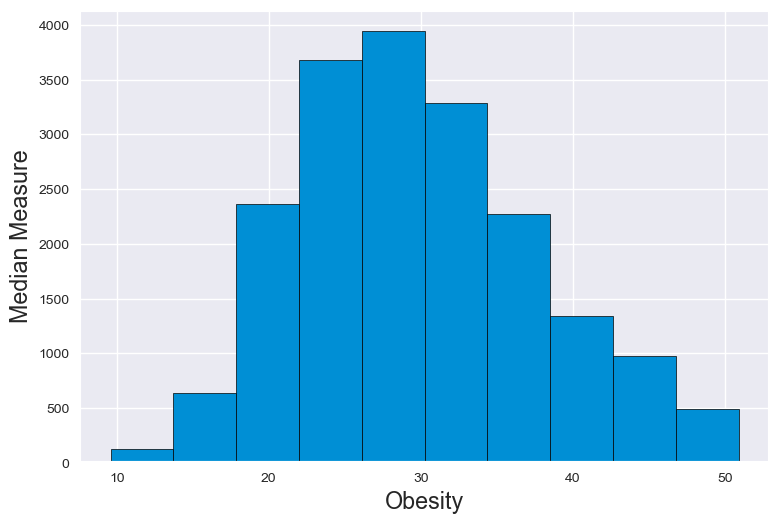

In [2608]:
#plt.title('Population by cities')
plt.xlabel('Obesity')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['OB_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

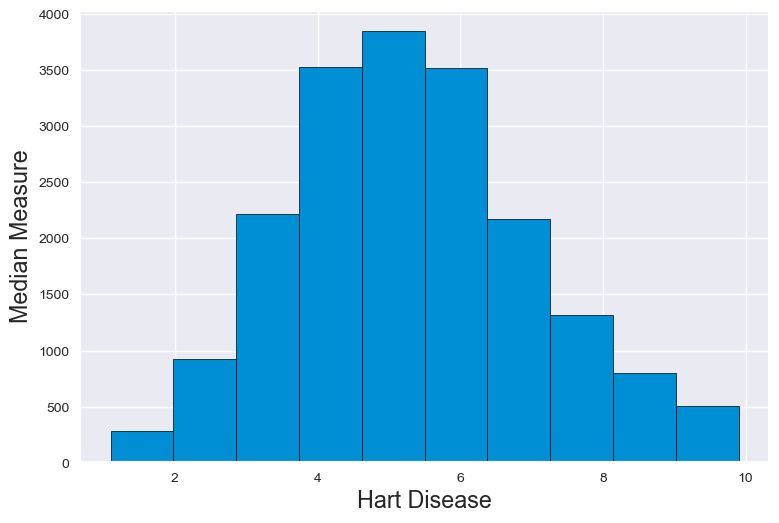

In [2609]:
#plt.title('Population')
plt.xlabel('Hart Disease')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HD_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

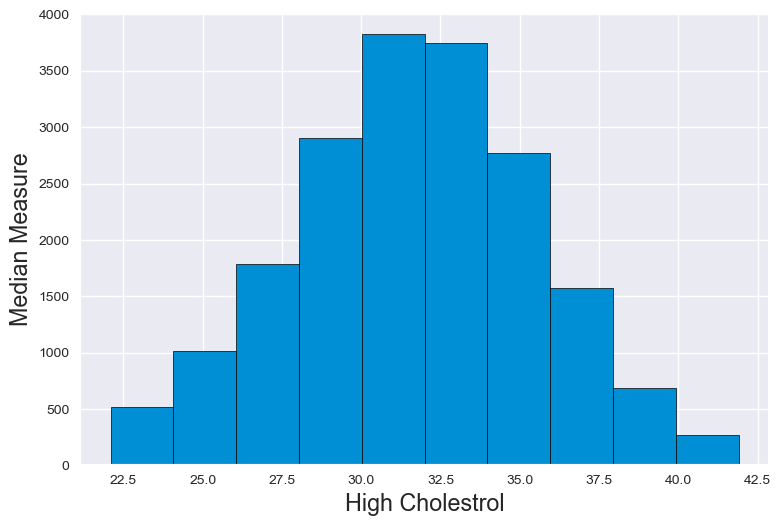

In [2610]:
plt.xlabel('High Cholestrol')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HC_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

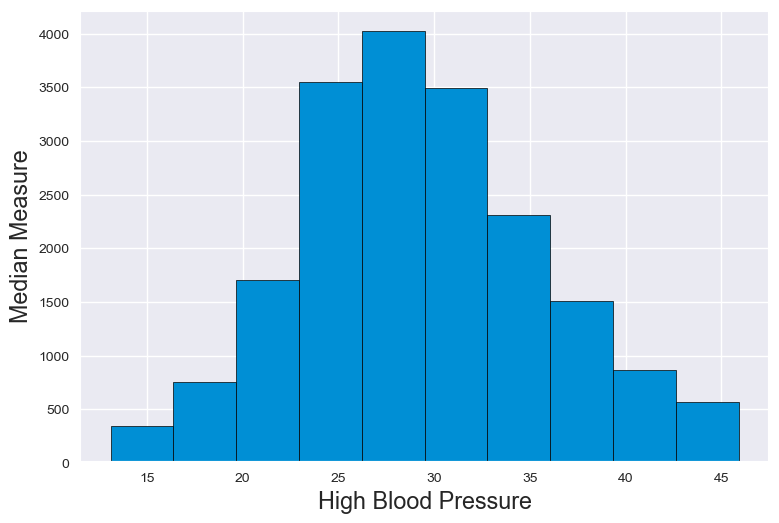

In [2611]:
plt.xlabel('High Blood Pressure')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['HBP_M_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

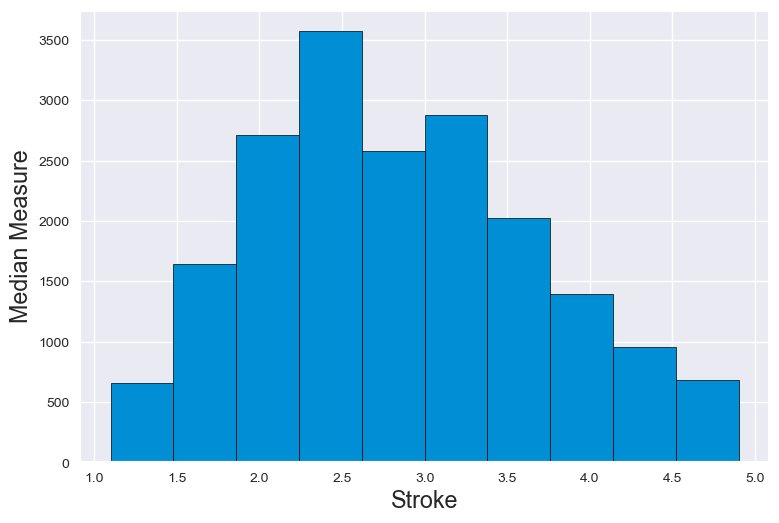

In [2612]:
plt.xlabel('Stroke')
plt.ylabel('Median Measure')
plt.tight_layout()

Diabetses_All_Measures = df[['Target_Value' ]]
plt.hist(Diabetses_All_Measures,  edgecolor='black')
plt.show()

In [2613]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

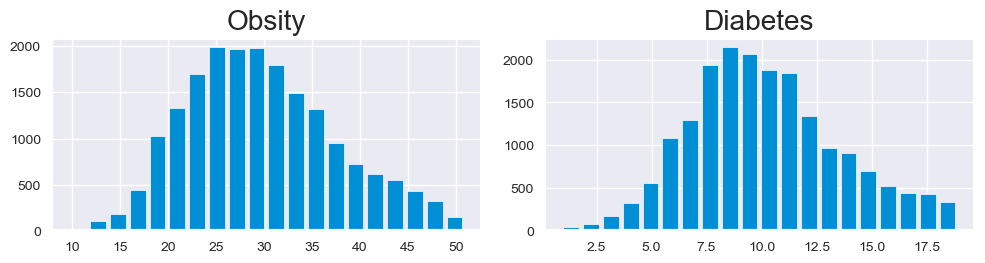

In [2614]:
# Histrogram - subplot


plt.figure(figsize= (15,5))
plt.subplot(2,3,1) 
plt.hist(df.OB_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Obsity')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,2) 
plt.hist(df.DB_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Diabetes')
#plt.ylabel('Median Measure')
plt.title('Diabetes')
plt.tight_layout()
#plt.legend(loc='upper right')




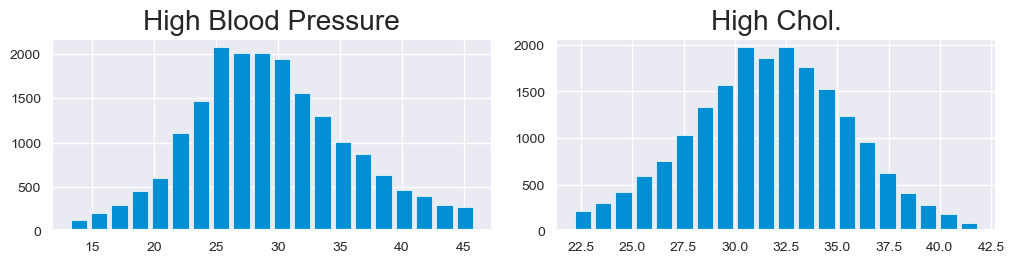

In [2615]:


plt.figure(figsize= (15,5))
plt.subplot(2,3,5) 
plt.hist(df.HBP_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('High Blood Pressure')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,6) 
plt.hist(df.HC_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('High Chol.')
plt.tight_layout()
#plt.legend(loc='upper right')




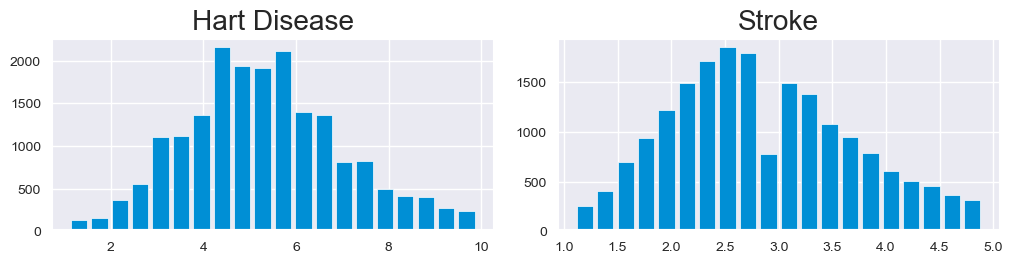

In [2616]:


plt.figure(figsize= (15,5))
plt.subplot(2,3,5) 
plt.hist(df.HD_M_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Hart Disease')
plt.tight_layout()
#plt.legend(loc='upper right')

plt.subplot(2,3,6) 
plt.hist(df.Target_Value, bins=20, histtype='bar', rwidth=0.8)
#plt.xlabel('Obesity Population')
#plt.ylabel('Median Measure')
plt.title('Stroke')
plt.tight_layout()
#plt.legend(loc='upper right')



In [2617]:
np.percentile(df['HD_M_Value'],1)

1.8

In [2618]:
np.percentile(df['HD_M_Value'],25)

4.1

In [2619]:
np.percentile(df['HD_M_Value'],50)

5.2

In [2620]:
np.percentile(df['HD_M_Value'],85)

7.1

In [2621]:
np.percentile(df['HD_M_Value'],95)

8.5

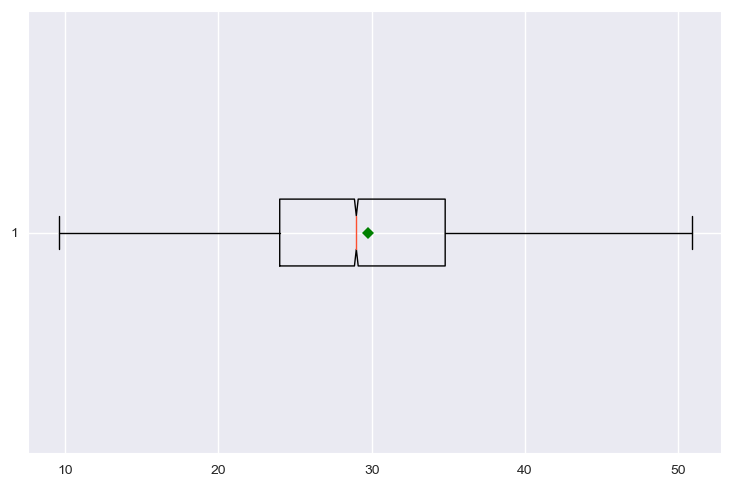

In [2622]:
#df['DB_M_Value'].plot(kind='box');
#plt.semilogy
# The line is the median(middle point)
# The diamon is the mean value
# Red circle is the outliers


red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['OB_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

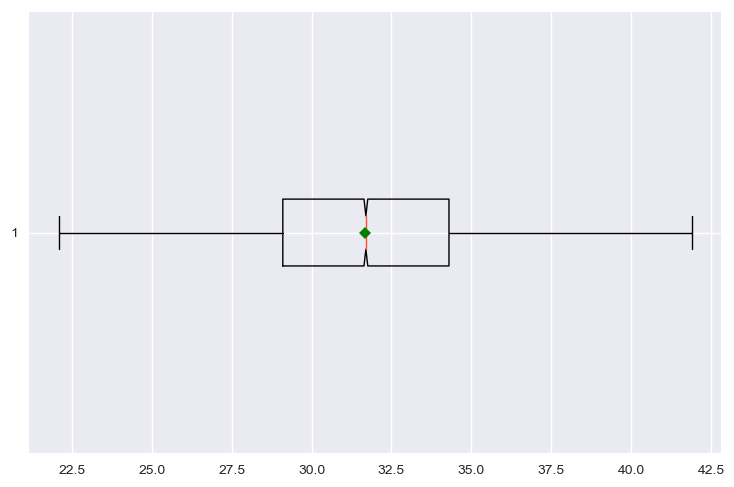

In [2623]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['HC_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

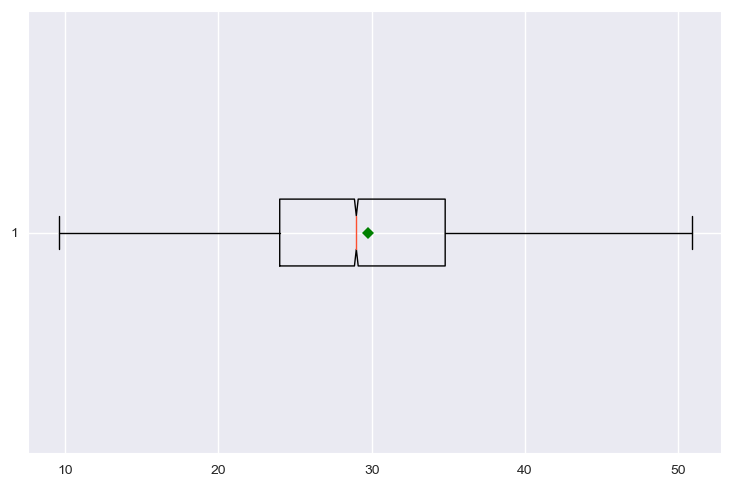

In [2624]:

red_circle = dict(markerfacecolor='red', marker='o')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

plt.boxplot(x=df['OB_M_Value'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

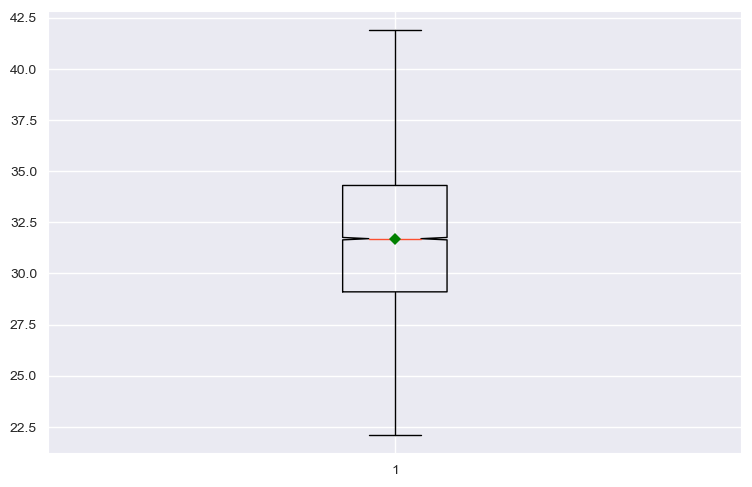

In [2625]:

red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['HC_M_Value'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

<Axes: xlabel='DB_M_Value'>

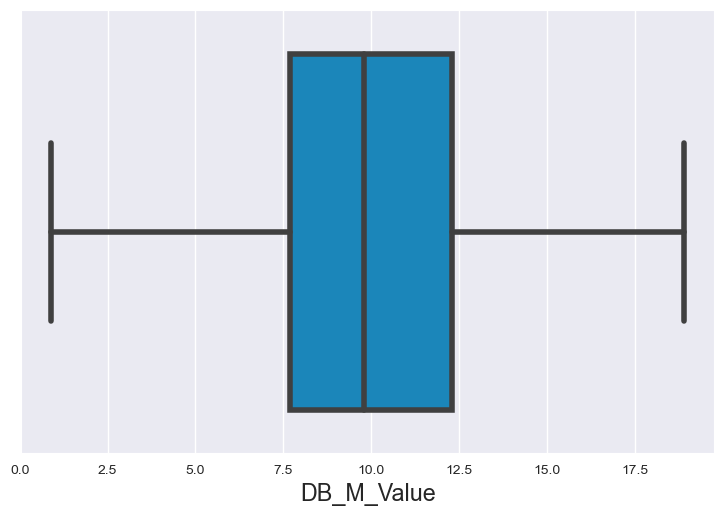

In [2626]:
sns.boxplot(x='DB_M_Value', data=df)

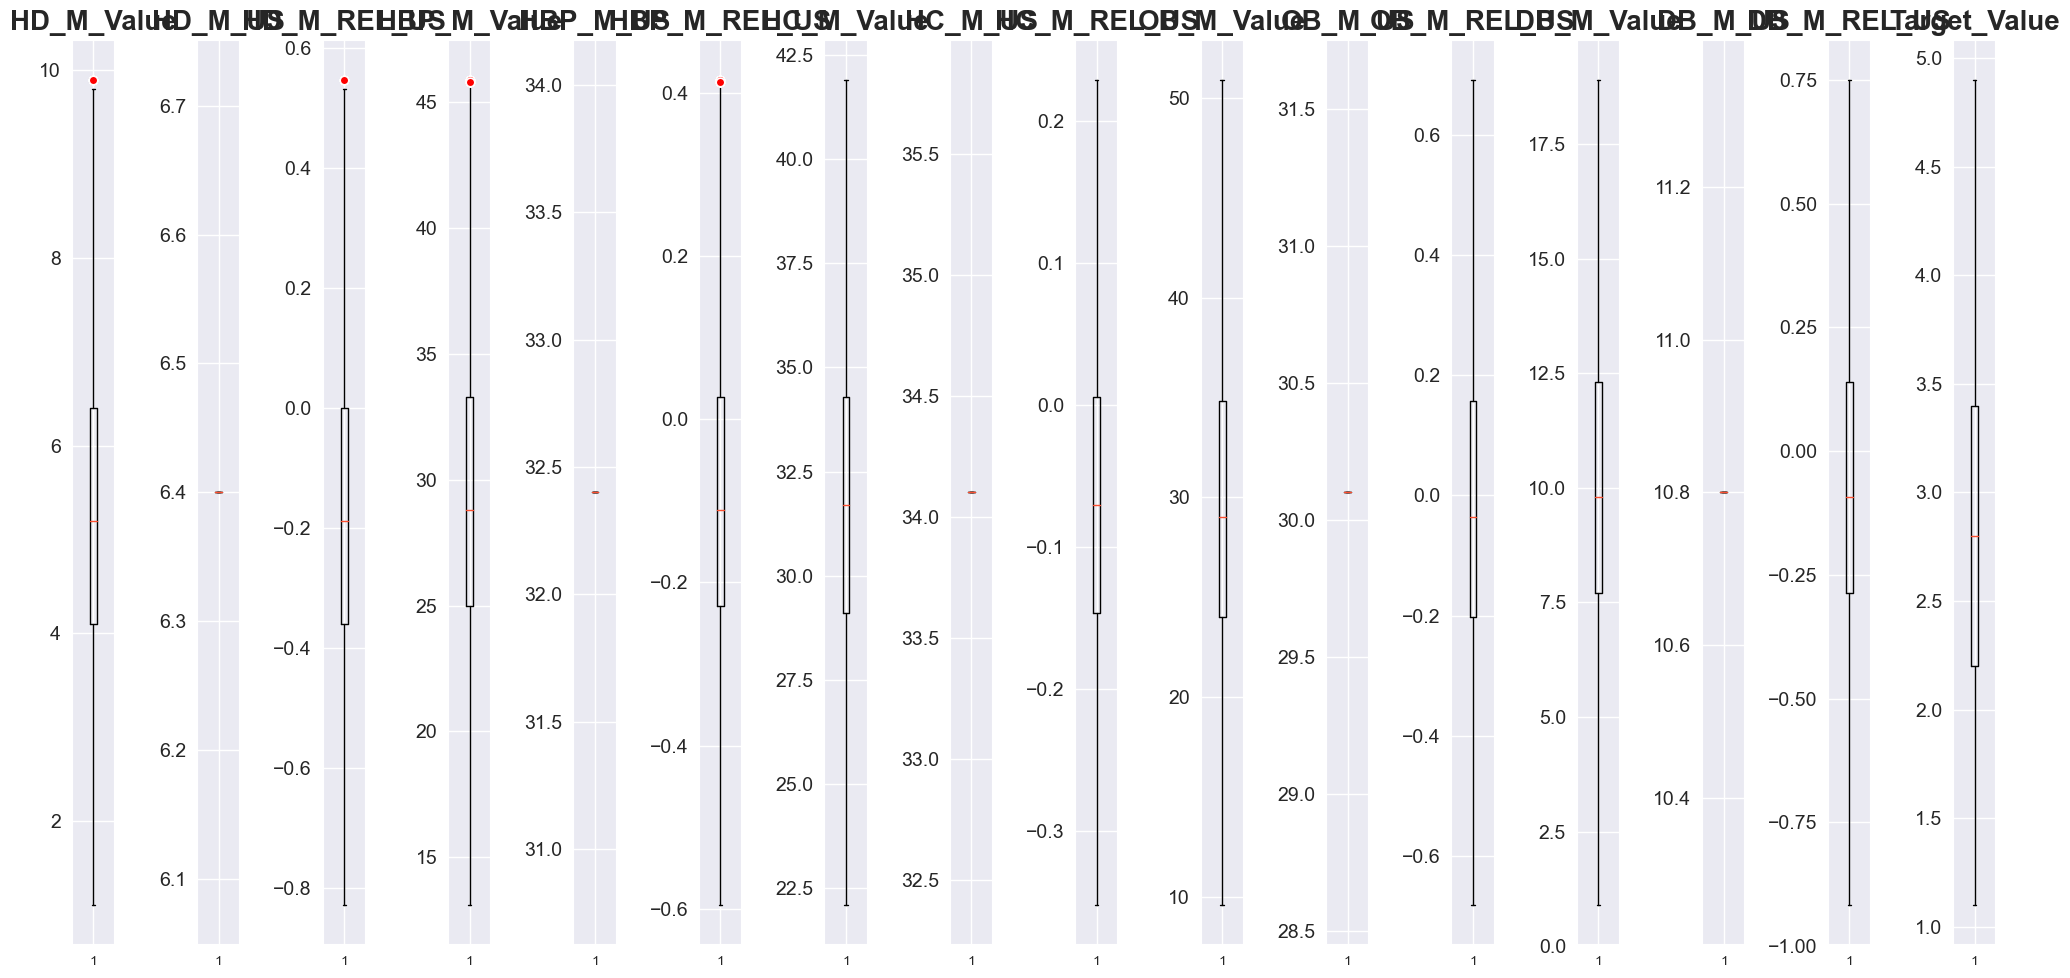

In [2627]:
#Subplot


red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
    if df.columns[i] == 'HD_M_Value' or  df.columns[i] == 'HD_M_US':
        ax.semilogy
        
plt.tight_layout()

In [2628]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HD_M_Value,19112.0,5.315435,1.704583e+00,1.100000,4.100000,5.200000,6.400000,9.900000
HD_M_US,19112.0,6.400000,2.153001e-12,6.400000,6.400000,6.400000,6.400000,6.400000
HD_M_REL_US,19112.0,-0.169463,2.663412e-01,-0.828125,-0.359375,-0.187500,0.000000,0.546875
HBP_M_Value,19112.0,29.301020,6.360551e+00,13.100000,25.000000,28.800000,33.300000,45.900000
HBP_M_US,19112.0,32.400000,1.168873e-11,32.400000,32.400000,32.400000,32.400000,32.400000
HBP_M_REL_US,19112.0,-0.095648,1.963133e-01,-0.595679,-0.228395,-0.111111,0.027778,0.416667
HC_M_Value,19112.0,31.673205,3.816437e+00,22.100000,29.100000,31.700000,34.300000,41.900000
HC_M_US,19112.0,34.100000,1.226429e-11,34.100000,34.100000,34.100000,34.100000,34.100000
HC_M_REL_US,19112.0,-0.071167,1.119190e-01,-0.351906,-0.146628,-0.070381,0.005865,0.228739
OB_M_Value,19112.0,29.778746,7.842022e+00,9.600000,24.000000,29.000000,34.800000,50.900000


In [2629]:
# Pairplot 
#df02 = df[df['HD_M_Value'] <= 4.200000 ]
#col_to_plot01 = ['HD_M_Value', 'HBP_M_Value', 'HC_M_Value', 'OB_M_Value', 'DB_M_Value']
#sns.pairplot(df02[col_to_plot01], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'brown'}})
#sns.pairplot(df02[col_to_plot01], hue='OB_M_Value' )


In [2630]:
# Scatter splot
#plt.scatter(x='HD_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9) # alpha is the clarity of the colors
#plt.scatter(x='HBP_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)
#plt.scatter(x='HC_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)
#plt.scatter(x='OB_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)
#plt.scatter(x='DB_M_Value', y='Target_Value', data=df, c='OB_M_Value', alpha=0.9)


#plt.xlabel('Heart Disease', fontsize=12)
#plt.xlabel('High Blood Pressure', fontsize=12)

#plt.ylabel('Stroke', fontsize=12)
#plt.colorbar(label='Gamma Ray - API')
#plt.show()

In [2631]:
df.columns

Index(['HD_M_Value', 'HD_M_US', 'HD_M_REL_US', 'HBP_M_Value', 'HBP_M_US',
       'HBP_M_REL_US', 'HC_M_Value', 'HC_M_US', 'HC_M_REL_US', 'OB_M_Value',
       'OB_M_US', 'OB_M_REL_US', 'DB_M_Value', 'DB_M_US', 'DB_M_REL_US',
       'Target_Value'],
      dtype='object')

## Dividing the dataset into independent and dependent features.

In [2632]:
df.head()

,HD_M_Value,HD_M_US,HD_M_REL_US,HBP_M_Value,HBP_M_US,HBP_M_REL_US,HC_M_Value,HC_M_US,HC_M_REL_US,OB_M_Value,OB_M_US,OB_M_REL_US,DB_M_Value,DB_M_US,DB_M_REL_US,Target_Value
0,4.2,6.4,-0.343750,32.3,32.4,-0.003086,34.1,34.1,0.000000,30.3,30.1,0.006645,12.2,10.8,0.129630,3.4
2,5.8,6.4,-0.093750,33.8,32.4,0.043210,36.7,34.1,0.076246,17.3,30.1,-0.425249,9.9,10.8,-0.083333,3.1
3,4.4,6.4,-0.312500,27.4,32.4,-0.154321,27.1,34.1,-0.205279,22.1,30.1,-0.265781,14.7,10.8,0.361111,2.0
5,3.5,6.4,-0.453125,24.4,32.4,-0.246914,27.5,34.1,-0.193548,25.3,30.1,-0.159468,11.4,10.8,0.055556,2.6
6,5.5,6.4,-0.140625,28.1,32.4,-0.132716,33.7,34.1,-0.011730,22.5,30.1,-0.252492,3.4,10.8,-0.685185,2.9


In [2633]:
ml01_df = df.drop(columns = ['HD_M_US', 'HD_M_REL_US','HBP_M_US', 'HBP_M_REL_US', 'HC_M_US',  'HC_M_REL_US', 'OB_M_US', 'OB_M_REL_US', 'DB_M_US', 'DB_M_REL_US' ])

In [2634]:
ml01_df.describe().T

,count,mean,std,min,25%,50%,75%,max
HD_M_Value,19112.0,5.315435,1.704583,1.1,4.1,5.2,6.4,9.9
HBP_M_Value,19112.0,29.301020,6.360551,13.1,25.0,28.8,33.3,45.9
HC_M_Value,19112.0,31.673205,3.816437,22.1,29.1,31.7,34.3,41.9
OB_M_Value,19112.0,29.778746,7.842022,9.6,24.0,29.0,34.8,50.9
DB_M_Value,19112.0,10.153558,3.429738,0.9,7.7,9.8,12.3,18.9
Target_Value,19112.0,2.840828,0.850926,1.1,2.2,2.8,3.4,4.9


In [2635]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from statistics import mean
from sklearn import linear_model

In [2636]:
# scatter plot the regression line of predicted value "STROKE" vs. each factor.
xs=ml01_df.iloc[:, :1] # Independent features - HD_M_Value.
ys=ml01_df.iloc[:, -1]  # dependent feature (Stroke).

In [ ]:
#Convert column into list for scatter plot

HD_df_ToList = ml01_df['HD_M_Value'] = ml01_df['HD_M_Value'].tolist()
STK_df_ToList = ml01_df['Target_Value'] = ml01_df['Target_Value'].tolist()
STK_df_ToList

In [2638]:
# Setting variables for X and Y on HD
xs = np.array(HD_df_ToList, dtype=np.float64)
ys = np.array(STK_df_ToList, dtype=np.float64)

In [2674]:
#  Manual calculation - HD_M_value * .035 - 2.65 = predicted value of stroke.

slope_HD_X = (((mean(xs) * mean(ys)) - mean(xs * ys))/ (( mean(xs) * mean(xs)) - mean(xs* xs)) )
xy_intercept = mean(ys) - slope * mean(xs)
HD_Predicted = ml01_df['HD_M_Value'] * slope_HD_X - xy_intercept

#print(slope_HD_X) #  the results - for every X increases(HD), the (Y) predicted to increase.
#print(xy_intercept)
print(HD_Predicted)




0       -2.501456
2       -2.444391
3       -2.494323
5       -2.526421
6       -2.455091
           ...   
27205   -2.533555
27206   -2.476490
27207   -2.412292
27208   -2.465790
27209   -2.480056
Name: HD_M_Value, Length: 19112, dtype: float64


In [2695]:
diff = ((STK_df_ToList) - (HD_Predicted))
print(diff)

0        5.901456
2        5.544391
3        4.494323
5        5.126421
6        5.355091
           ...   
27205    3.833555
27206    5.576490
27207    6.912292
27208    7.365790
27209    7.380056
Name: HD_M_Value, Length: 19112, dtype: float64


In [2692]:
pred_HD_df = pd.DataFrame({'Actual HD Value':ml01_df['HD_M_Value'], 'Slope':(((mean(xs) * mean(ys)) - mean(xs * ys))/ (( mean(xs) * mean(xs)) - mean(xs* xs)) ) , 'Intercept':mean(ys) - slope * mean(xs),   'Predicted':ml01_df['HD_M_Value'] * slope_HD_X - xy_intercept, 'Target':ml01_df['Target_Value'], 'Diff':ml01_df['Target_Value'] - (ml01_df['HD_M_Value'] * slope_HD_X - xy_intercept) })
#pred_HD_df = pd.DataFrame({'Actual HD Value':ml01_df['HD_M_Value'], 'Slope':(((mean(xs) * mean(ys)) - mean(xs * ys))/ (( mean(xs) * mean(xs)) - mean(xs* xs)) ) , 'Intercept':mean(ys) - slope * mean(xs),   'Predicted':ml01_df['HD_M_Value'] * slope_HD_X - xy_intercept, 'Target':ml01_df['Target_Value'], 'Diff':pred_HD_df['Target'] - pred_HD_df['Predicted'] })
pred_HD_df

,Actual HD Value,Slope,Intercept,Predicted,Target,Diff
0,4.2,0.035665,2.65125,-2.501456,3.4,5.901456
2,5.8,0.035665,2.65125,-2.444391,3.1,5.544391
3,4.4,0.035665,2.65125,-2.494323,2.0,4.494323
5,3.5,0.035665,2.65125,-2.526421,2.6,5.126421
6,5.5,0.035665,2.65125,-2.455091,2.9,5.355091
...,...,...,...,...,...,...
27205,3.3,0.035665,2.65125,-2.533555,1.3,3.833555
27206,4.9,0.035665,2.65125,-2.476490,3.1,5.576490
27207,6.7,0.035665,2.65125,-2.412292,4.5,6.912292
27208,5.2,0.035665,2.65125,-2.465790,4.9,7.365790


In [2641]:
Stroke_and_HD = linear_model.LinearRegression()
Stroke_and_HD.fit(xs.reshape(-1,1),ys)


LinearRegression()

In [2642]:
regression_line = Stroke_and_HD.predict(xs.reshape(-1,1))

C:\Users\dolly\AppData\Local\Temp\ipykernel_2988\2114411019.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


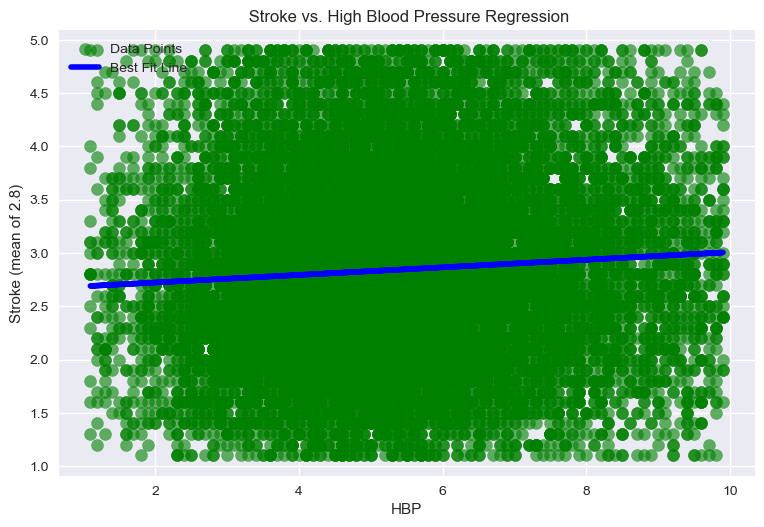

In [2643]:
style.use('seaborn')
plt.scatter(xs,ys, label='Data Points', alpha=0.6, color='green', s=75)
plt.plot(xs, regression_line, label ='Best Fit Line', color='blue', linewidth=4)
plt.title(' Stroke vs. High Blood Pressure Regression')
plt.xlabel('HBP')
plt.ylabel('Stroke (mean of 2.8)')
plt.legend()
plt.show()

Next:

In [2644]:
# check the corr against the Target_value.
ml01_df.corr()['Target_Value']



HD_M_Value      0.071445
HBP_M_Value     0.062355
HC_M_Value      0.039616
OB_M_Value      0.058736
DB_M_Value      0.000447
Target_Value    1.000000
Name: Target_Value, dtype: float64

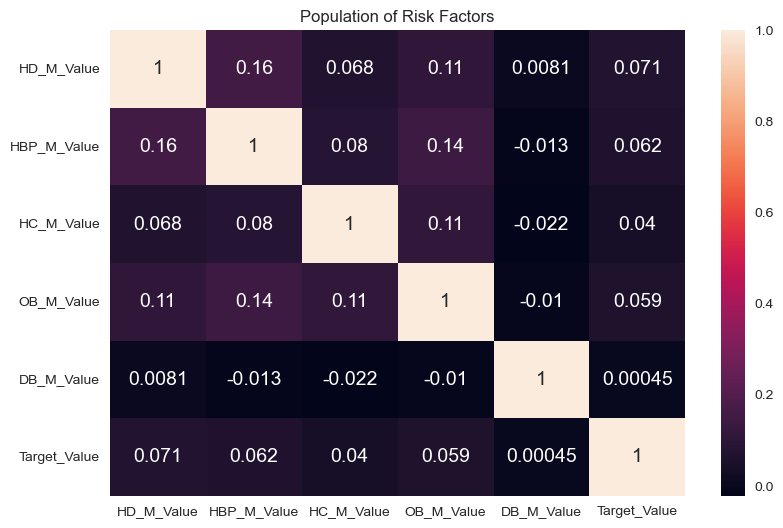

In [2645]:
plt.title('Population of Risk Factors')
plt.tight_layout()
df_corr = df[['HD_M_Value',	'HBP_M_Value',	'HC_M_Value',	'OB_M_Value',	'DB_M_Value',	'Target_Value']].corr()
sns.heatmap(df_corr, annot=True)
plt.show()

#### Below is the dataframe for the ML models:

In [2646]:

X=ml01_df.iloc[:, :-1] # Independent features.
y=ml01_df.iloc[:, -1]  # dependent feature (Stroke).

X
#y

,HD_M_Value,HBP_M_Value,HC_M_Value,OB_M_Value,DB_M_Value
0,4.2,32.3,34.1,30.3,12.2
2,5.8,33.8,36.7,17.3,9.9
3,4.4,27.4,27.1,22.1,14.7
5,3.5,24.4,27.5,25.3,11.4
6,5.5,28.1,33.7,22.5,3.4
...,...,...,...,...,...
27205,3.3,20.8,27.6,33.8,11.9
27206,4.9,32.5,30.7,33.0,7.4
27207,6.7,31.3,28.0,33.9,10.3
27208,5.2,31.9,34.1,29.7,16.4


ML Analysis - LinearRegression Model

In [2647]:
# laod types of model to use.
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [2648]:
# Setting up the plit -  Training/Test set.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
#80% training - it chooses ramdom samples.
len(X_train)
#30% or what ever % specified.
len(X_test)

X_train
#X_test
#y_train

,HD_M_Value,HBP_M_Value,HC_M_Value,OB_M_Value,DB_M_Value
9513,6.7,29.1,25.8,16.3,5.5
14755,5.1,44.7,36.7,33.1,6.0
2900,5.7,27.2,28.6,28.9,7.1
13325,7.3,40.9,29.9,40.5,12.4
9134,9.6,45.1,22.2,37.8,11.8
...,...,...,...,...,...
7618,6.0,31.8,23.5,34.0,10.3
2335,5.0,29.5,36.6,20.1,9.5
18253,5.1,39.0,31.5,13.5,9.4
6062,4.0,20.9,30.6,15.5,9.3


ML Analyzing using - Linear Regression Model.

In [2649]:
# Fit/load into a model
modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)
#y_test

LinearRegression()

In [2651]:
ml01_df.head()

,HD_M_Value,HBP_M_Value,HC_M_Value,OB_M_Value,DB_M_Value,Target_Value
0,4.2,32.3,34.1,30.3,12.2,3.4
2,5.8,33.8,36.7,17.3,9.9,3.1
3,4.4,27.4,27.1,22.1,14.7,2.0
5,3.5,24.4,27.5,25.3,11.4,2.6
6,5.5,28.1,33.7,22.5,3.4,2.9


In [2696]:
modelReg.predict([[ 4.2, 32.3,	34.1,	30.3,	12.2,	 ]])

c:\Users\dolly\AppData\Local\R-MINI~1\envs\datascience-pro-env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.83634497])

In [2697]:

modelReg.predict(X_test) # Run predication of X test
modelReg.score(X_test,y_test) # See the performance of the test, the resutls diff on each run
y_pred = modelReg.predict(X_test) # define variable for X test
 
print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  

print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

print("mape:{}  ".format(y_pred - y_test / y_test))




0.007461388162369298
Score 0.007461388162369298
r2:-83.08448336275818  
mae:0.68139472685461  
mean_absolute_error =  0.68139472685461
mean_absolute_percentage_error =  0.23981196338864788
mape:19190    1.812283
21723    1.874023
17795    1.869107
21831    1.909125
7324     1.762326
           ...   
6629     1.821446
19064    1.816067
20177    1.982846
5691     1.760582
21061    1.770822
Name: Target_Value, Length: 5734, dtype: float64  


In [2659]:
mape =  y_pred - y_test / y_test
mape 

19190    1.812283
21723    1.874023
17795    1.869107
21831    1.909125
7324     1.762326
           ...   
6629     1.821446
19064    1.816067
20177    1.982846
5691     1.760582
21061    1.770822
Name: Target_Value, Length: 5734, dtype: float64

In [2660]:
# Actual Value
# y_test

#Predicted Strok Value
y_pred

array([2.81228313, 2.87402327, 2.86910705, ..., 2.98284627, 2.76058198,
       2.77082203])

Predicted Values save to df - Linear Regression 

In [2661]:
# Actual value * slope_x - intercept = predicted value  

pred_y_df = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'Diff_(Errors)':y_test-y_pred,  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'MAPE':y_pred - y_test / y_test })
pred_y_df[0:20]


,Actual Stroke Value,Predicted Value,Diff_(Errors),Sqr,MAPE
19190,2.1,2.812283,-0.712283,5.073473e-01,1.812283
21723,3.4,2.874023,0.525977,2.766515e-01,1.874023
17795,3.0,2.869107,0.130893,1.713296e-02,1.869107
21831,3.1,2.909125,0.190875,3.643324e-02,1.909125
7324,3.4,2.762326,0.637674,4.066276e-01,1.762326
25919,2.9,2.899751,0.000249,6.215758e-08,1.899751
13150,2.0,2.950567,-0.950567,9.035777e-01,1.950567
5652,2.3,2.717498,-0.417498,1.743049e-01,1.717498
21488,3.9,2.810528,1.089472,1.186949e+00,1.810528
2347,3.2,2.760131,0.439869,1.934850e-01,1.760131


In [2662]:

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(pred_y_df['Actual Stroke Value'],pred_y_df['Predicted Value'] )
print('mean_squared_error = ', MSE )

#SSE - sum of sqr, the goal is to reduced SSE (compare to SSE before removing the outliers)
SSE = pred_y_df['Sqr'].sum()

print("Sum Square Err (SSE) = ", SSE)

mean_squared_error =  0.7115062076507306
Sum Square Err (SSE) =  4079.776594669289


ML Analyzing using - Decision Tree Model.

In [2663]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor

modelDT= DecisionTreeRegressor()
modelDT.fit(X_train,y_train)
modelDT.predict(X_test)
#y_test  


modelDT.predict(X_test) # Run predication of X test
modelDT.score(X_test,y_test) # See the performance of the test, the resutls diff on each run
y_pred = modelDT.predict(X_test) # define variable for X test


In [2664]:
print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error
print("mape:{}  ".format(y_pred - y_test / y_test))

Score -1.0306286796990096
r2:-0.8253565425259259  
mae:0.9651028950122078  
mean_absolute_error =  0.9651028950122078
mean_absolute_percentage_error =  0.37748497958643784
mape:19190    2.9
21723    1.2
17795    2.1
21831    0.5
7324     2.7
        ... 
6629     2.5
19064    1.4
20177    3.4
5691     1.3
21061    2.5
Name: Target_Value, Length: 5734, dtype: float64  


In [2665]:
pred_y_df_DT = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'Diff_(Errors)':y_test-y_pred,  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'MAPE':y_pred - y_test / y_test })
pred_y_df_DT[0:20]

,Actual Stroke Value,Predicted Value,Diff_(Errors),Sqr,MAPE
19190,2.1,3.9,-1.8,3.24,2.9
21723,3.4,2.2,1.2,1.44,1.2
17795,3.0,3.1,-0.1,0.01,2.1
21831,3.1,1.5,1.6,2.56,0.5
7324,3.4,3.7,-0.3,0.09,2.7
25919,2.9,1.8,1.1,1.21,0.8
13150,2.0,4.2,-2.2,4.84,3.2
5652,2.3,1.9,0.4,0.16,0.9
21488,3.9,1.8,2.1,4.41,0.8
2347,3.2,1.8,1.4,1.96,0.8


In [2666]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(pred_y_df_DT['Actual Stroke Value'],pred_y_df_DT['Predicted Value'] )
print('mean_squared_error = ', MSE )

#SSE - sum of sqr, the goal is to reduced SSE (compare to SSE before removing the outliers)
SSE = pred_y_df_DT['Sqr'].sum()

print("SSE = ", SSE)

mean_squared_error =  1.4556662016044648
SSE =  8346.79


#### ML Analyzing using - RandomForestRegressor Model.

In [2667]:
from sklearn.ensemble import RandomForestRegressor


modelRF = RandomForestRegressor()
modelRF.fit(X_train,y_train)
modelRF.predict(X_test)
y_test
modelRF.score(X_test,y_test)
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
y_pred = modelRF.predict(X_test)


print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))

print('mean_absolute_error = ', mean_absolute_error(y_pred,y_test))
print('mean_absolute_percentage_error = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error
print("mape:{}  ".format(y_pred - y_test / y_test))


Score -0.04097199600442236
r2:-13.388309355712787  
mae:0.6972392745029649  
mean_absolute_error =  0.6972392745029649
mean_absolute_percentage_error =  0.24535677007704654
mape:19190    2.286
21723    2.011
17795    2.149
21831    1.839
7324     2.136
         ...  
6629     1.786
19064    1.856
20177    2.278
5691     1.821
21061    1.871
Name: Target_Value, Length: 5734, dtype: float64  


In [2668]:
pred_y_df_RF = pd.DataFrame({'Actual Stroke Value':y_test, 'Predicted Value':y_pred, 'Diff_(Errors)':y_test-y_pred,  'Sqr':(y_test-y_pred)*(y_test-y_pred),  'MAPE':y_pred - y_test / y_test })
pred_y_df[0:20]

,Actual Stroke Value,Predicted Value,Diff_(Errors),Sqr,MAPE
19190,2.1,2.812283,-0.712283,5.073473e-01,1.812283
21723,3.4,2.874023,0.525977,2.766515e-01,1.874023
17795,3.0,2.869107,0.130893,1.713296e-02,1.869107
21831,3.1,2.909125,0.190875,3.643324e-02,1.909125
7324,3.4,2.762326,0.637674,4.066276e-01,1.762326
25919,2.9,2.899751,0.000249,6.215758e-08,1.899751
13150,2.0,2.950567,-0.950567,9.035777e-01,1.950567
5652,2.3,2.717498,-0.417498,1.743049e-01,1.717498
21488,3.9,2.810528,1.089472,1.186949e+00,1.810528
2347,3.2,2.760131,0.439869,1.934850e-01,1.760131


In [2669]:

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(pred_y_df_RF['Actual Stroke Value'],pred_y_df_RF['Predicted Value'] )
print('mean_squared_error = ', MSE )

#SSE - sum of sqr, the goal is to reduced SSE (compare to SSE before removing the outliers)
SSE = pred_y_df_RF['Sqr'].sum()

print("SSE = ", SSE)

mean_squared_error =  0.7462259183815835
SSE =  4278.859415999999
